# Chapter 15: Timeseries and Forecasting

We will examine time series using https://fred.stlouisfed.org/series/TOTALNSA


In [1]:
# package for working with tabular data
import pandas as pd 
import numpy as np

# Package for charting
import matplotlib.pyplot as plt
import seaborn as sns #charts

# package for timing runtime
import time

# Math...
import math
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels as sm

# package for navigating the operating system
import os

Load in CSV data: Let us start by loading all the data

In [2]:
loc = "TOTALNSA.csv"
start_time = time.time()

# deal with datetime in the csv...
mydateparser = lambda x: pd.datetime.strptime(x, 'm%/d%/y%')
#Upload
df = pd.read_csv(loc, header=0, index_col=0, parse_dates=['DATE']) #, date_parser=mydateparser)
df.fillna(0)

print("It took %s seconds to load the .csv file." % (time.time() - start_time))

It took 0.010999679565429688 seconds to load the .csv file.


In [3]:
df

,TOTALNSA
DATE,
1976-01-01,885.200
1976-02-01,994.700
1976-03-01,1243.600
1976-04-01,1191.200
1976-05-01,1203.200
...,...
2021-12-01,1251.035
2022-01-01,1022.365
2022-02-01,1077.895


<AxesSubplot:title={'center':'US Total Vehicle Sales (thousands of units)'}, xlabel='DATE'>

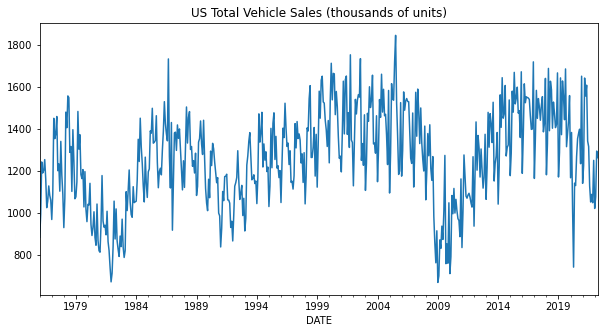

In [4]:
plt.figure(figsize=(10, 5)) 
plt.title('US Total Vehicle Sales (thousands of units)') 
df['TOTALNSA'].plot()


Timseries decomposition

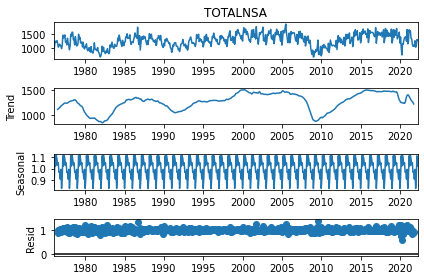

In [5]:
result = seasonal_decompose(df['TOTALNSA'], model='multiplicable')
result.plot()
plt.show()

In [6]:
df['TOTALNSA'].shape

(556,)

In [7]:
## Experimenting with Trend, Seasonality and Noise 

In [8]:
df

,TOTALNSA
DATE,
1976-01-01,885.200
1976-02-01,994.700
1976-03-01,1243.600
1976-04-01,1191.200
1976-05-01,1203.200
...,...
2021-12-01,1251.035
2022-01-01,1022.365
2022-02-01,1077.895


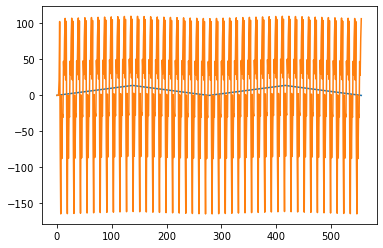

In [9]:
# seasonal effect
# average the seasonal effect over the monthly time series
seasons_year = np.zeros(12)

# Get average seasonality
for i in range(df.shape[0]-1,12,-12):
    for j in range(0,12):
        seasons_year[j] +=  df['TOTALNSA'].iloc[i-j] / (df.shape[0]/12) #* df['TOTALNSA'].iloc[i-13] / df['TOTALNSA'].iloc[i]

# Repeat this seasonabilty from 1970s-present
avg = np.average(seasons_year)
seasons_year = seasons_year - avg

seasons = df.copy(deep=True)
seasons['TOTALNSA'] = 0
for i in range(df.shape[0], 12,-12):
    seasons['TOTALNSA'].iloc[i-12:i] = seasons_year
seasons = seasons['TOTALNSA'].to_numpy()    
    
# Trend...
trend = df.copy(deep=True)
trend['TOTALNSA'] = 0
for i in range(1, df.shape[0], 1):
    if i < df.shape[0] * 0.25:
        trend['TOTALNSA'].iloc[i] += trend['TOTALNSA'].iloc[i-1] + 0.1
    elif i < df.shape[0] * 0.5:
        trend['TOTALNSA'].iloc[i] += trend['TOTALNSA'].iloc[i-1] - 0.1
    elif i < df.shape[0] * 0.75:
        trend['TOTALNSA'].iloc[i] += trend['TOTALNSA'].iloc[i-1] + 0.1
    elif i <= df.shape[0] * 1:
        trend['TOTALNSA'].iloc[i] += trend['TOTALNSA'].iloc[i-1] - 0.1
    
trend = trend['TOTALNSA'].to_numpy() 

plt.plot(trend)


# Plot a sine wave using time and amplitude obtained for the sine wave
#plt.plot(time, amplitude)

bal = 0.75
plt.plot(seasons * bal + trend * (1-bal))


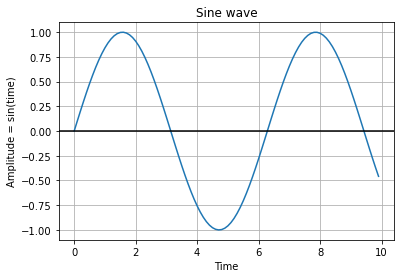

In [10]:

    
time = np.arange(0, 10, 0.1);
amplitude   = np.sin(time);
# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(time, amplitude)

 

# Give a title for the sine wave plot

plt.title('Sine wave')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

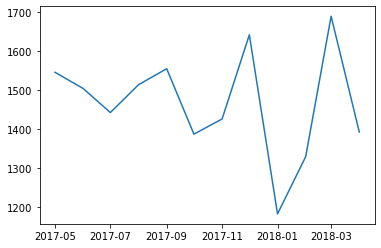

In [11]:
df[1:13]
plt.plot(df[-60:-48])
plt.show()

# Moving Average

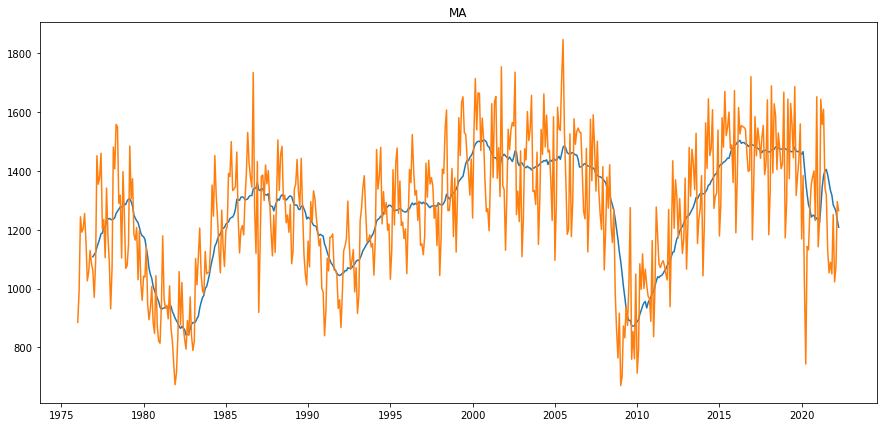

In [12]:
plt.figure(figsize=(15, 7)) 

#find the trend using a moving average
df_ma = df.rolling(window=12).mean()
df_ma = df_ma.dropna()

plt.plot(df_ma)
plt.plot(df['TOTALNSA'])
plt.title('MA')
plt.show()

# Extrapolation

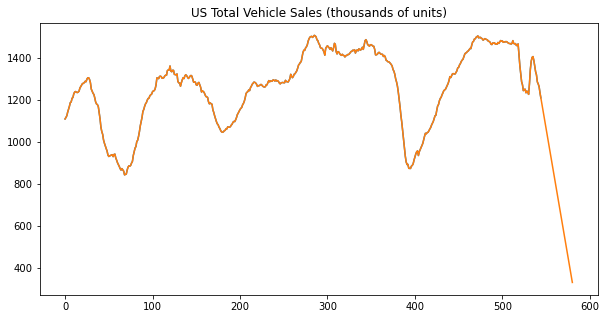

In [13]:
from scipy import interpolate

x = range(0, df_ma.shape[0]) #[x for x in range(0, df.shape[0])]
x_extrap = range(0, df_ma.shape[0]+36)
df_extr = interpolate.interp1d(x, df_ma['TOTALNSA'], fill_value='extrapolate')

plt.figure(figsize=(10, 5)) 
plt.title('US Total Vehicle Sales (thousands of units)') 
plt.plot(df_ma['TOTALNSA'].to_numpy())
plt.plot(df_extr(x_extrap))

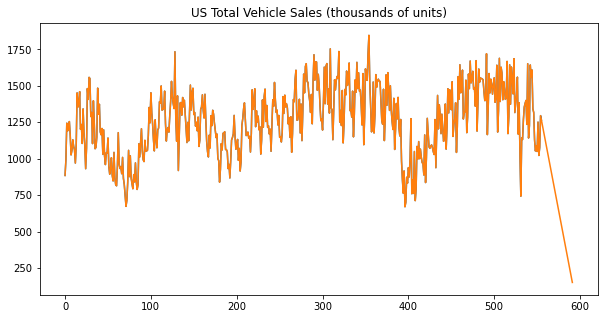

In [14]:
from scipy import interpolate

x = range(0, df.shape[0]) #[x for x in range(0, df.shape[0])]
x_extrap = range(0, df.shape[0]+36)

df_extr = interpolate.interp1d(x, df['TOTALNSA'], fill_value='extrapolate')

plt.figure(figsize=(10, 5)) 
plt.title('US Total Vehicle Sales (thousands of units)') 
plt.plot(df['TOTALNSA'].to_numpy())
plt.plot(df_extr(x_extrap))

# Autocorrelation


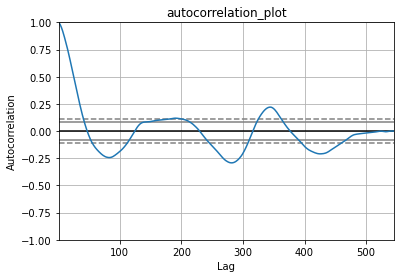

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_ma)
plt.title('autocorrelation_plot')
plt.show()

In [16]:
df_ma

,TOTALNSA
DATE,
1976-12-01,1107.875000
1977-01-01,1114.933333
1977-02-01,1123.050000
1977-03-01,1140.341667
1977-04-01,1153.941667
...,...
2021-12-01,1284.047083
2022-01-01,1274.101750
2022-02-01,1261.700167


# AR Model of Trend

                            AutoReg Model Results                             
Dep. Variable:               TOTALNSA   No. Observations:                  545
Model:             Restr. AutoReg(12)   Log Likelihood               -3202.539
Method:               Conditional MLE   S.D. of innovations             98.453
Date:                Tue, 09 Aug 2022   AIC                              9.190
Time:                        17:08:42   BIC                              9.214
Sample:                    12-01-1977   HQIC                             9.200
                         - 04-01-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      224.9015     31.134      7.224      0.000     163.881     285.922
TOTALNSA.L12     0.8246      0.024     33.767      0.000       0.777       0.872
                                    Roots   

C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


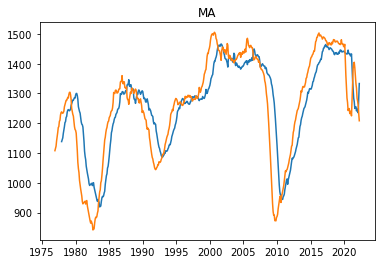

In [17]:
from statsmodels.tsa.ar_model import AutoReg

# AR model
df_ma = df_ma.dropna()
mod = AutoReg(df_ma,lags=[12]).fit()
print(mod.summary())

#Plot
plt.plot(mod.predict(12))
plt.plot(df_ma)
plt.title('MA')
plt.show()

C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


                            AutoReg Model Results                             
Dep. Variable:               TOTALNSA   No. Observations:                  545
Model:             Restr. AutoReg(12)   Log Likelihood               -1978.037
Method:               Conditional MLE   S.D. of innovations              9.897
Date:                Tue, 09 Aug 2022   AIC                              4.618
Time:                        17:08:45   BIC                              4.690
Sample:                    12-01-1977   HQIC                             4.646
                         - 04-01-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        8.3864      3.328      2.520      0.012       1.864      14.909
TOTALNSA.L1      1.4863      0.043     34.687      0.000       1.402       1.570
TOTALNSA.L2     -0.4215      0.077     -5.49

C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


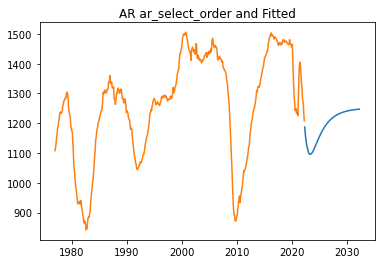

In [18]:
# Get optimal lags for the AR model
from statsmodels.tsa.ar_model import ar_select_order
lags = ar_select_order(df, maxlag=12, glob=True)
lags.ar_lags

# FIt AR model
df_ma = df_ma.dropna()
mod = AutoReg(df_ma,lags=lags.ar_lags).fit()
print(mod.summary())

#Plot 120months of out of sample forecast
plt.plot(mod.forecast(120))
plt.plot(df_ma)
plt.title('AR ar_select_order and Fitted')
plt.show()

## Differencing
Detrending timeseries

In [19]:
# Detrend by subtraction
detrended = df['TOTALNSA'].iloc[1:].to_numpy() - df['TOTALNSA'].iloc[:-1].to_numpy()
df_detrended = df.iloc[1:]
df_detrended['TOTALNSA'] = detrended

# Detrend by division
detrended2 = df['TOTALNSA'].iloc[1:].to_numpy() / df['TOTALNSA'].iloc[:-1].to_numpy()
df_detrended2 = df.iloc[1:]
df_detrended2['TOTALNSA'] = df_detrended2

# vs Trend
detrended_ma = df_ma.iloc[1:].to_numpy() - df_ma.iloc[:-1].to_numpy()
df_detrended_ma = df_ma.iloc[1:]
df_detrended_ma['TOTALNSA'] = detrended_ma
df_detrended_ma

<ipython-input-19-dd27199c70d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detrended['TOTALNSA'] = detrended
<ipython-input-19-dd27199c70d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_detrended2['TOTALNSA'] = df_detrended2
<ipython-input-19-dd27199c70d2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,TOTALNSA
DATE,
1977-01-01,7.058333
1977-02-01,8.116667
1977-03-01,17.291667
1977-04-01,13.600000
1977-05-01,14.491667
...,...
2021-12-01,-33.364250
2022-01-01,-9.945333
2022-02-01,-12.401583


In [20]:
df

,TOTALNSA
DATE,
1976-01-01,885.200
1976-02-01,109.500
1976-03-01,248.900
1976-04-01,-52.400
1976-05-01,12.000
...,...
2021-12-01,201.431
2022-01-01,-228.670
2022-02-01,55.530


In [21]:
# Get optimal lags for the ARMA model
from statsmodels.tsa.arima_model import ARIMA

# Auto ARIMA
def auto_ARIMA(srs: np.ndarray, p_max: int = 12, d_max: int = 12, q_max: int = 12) -> (ARIMA, []):
    max_aic = -999.999
    max_mod = None
    for p in range(1, p_max, int(p_max/10+1)):
        for d in range(0, d_max, int(d_max/10+1)):
            for q in range(0, q_max, int(q_max/10+1)):
                try:
                    mod = ARIMA(srs, order=(p,d,q)).fit()
                    if(mod.aic >= max_aic):
                        max_aic = mod.aic
                        max_mod = mod
                        max_order = [p,d,q]
                except:
                    pass
    return(max_mod, max_order)

C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\danph\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  554
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -4064.029
Method:                       css-mle   S.D. of innovations            371.007
Date:                Tue, 09 Aug 2022   AIC                           8134.058
Time:                        18:02:05   BIC                           8147.010
Sample:                             2   HQIC                          8139.118
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5760      9.222      0.062      0.950     -17.499      18.651
ar.L1.D2.y    -0.7105      0.030    -23.718      0.000      -0.769      -0.652
                                    Roots           

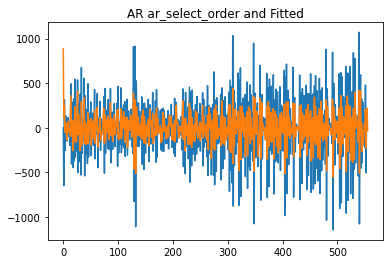

In [22]:

# Auto ARIMA, solves p,d,q based on a maximization of AIC
mod, order = auto_ARIMA(df['TOTALNSA'].to_numpy())

print(mod.summary())


# one-step out-of sample forecast
forecast = mod.predict()#start=0, end=120)

#Plot 120months of out of sample forecast
plt.plot(forecast)
plt.plot(df['TOTALNSA'].to_numpy())
plt.title('AR ar_select_order and Fitted')
plt.show()

In [23]:
df
order

[1, 2, 0]

                             ARIMA Model Results                              
Dep. Variable:            D2.TOTALNSA   No. Observations:                  554
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -4064.029
Method:                       css-mle   S.D. of innovations            371.007
Date:                Tue, 09 Aug 2022   AIC                           8134.058
Time:                        18:02:05   BIC                           8147.010
Sample:                    03-01-1976   HQIC                          8139.118
                         - 04-01-2022                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5760      9.222      0.062      0.950     -17.499      18.651
ar.L1.D2.TOTALNSA    -0.7105      0.030    -23.718      0.000      -0.769      -0.652
                        

C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\danph\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

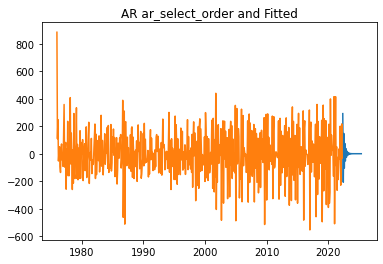

In [24]:
# FIt AR model
#mod = ARIMA(df, order=(1,1,1)).fit()

mod = ARIMA(df['TOTALNSA'], order=(order[0],order[1],order[2])).fit()
print(mod.summary())


#Plot 120months of out of sample forecast
plt.plot(mod.predict(start=df.shape[0], end=df.shape[0]+36))
plt.plot(df)
plt.title('AR ar_select_order and Fitted')
plt.show()